# Creating dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [27]:
DATADIR = '../datasets/Classification/Dataset - 3 dias/Images'
CATEGORIES = ["Normal", "Anormal", "Morta"]

In [3]:
def create_training_data():
    training_data = []
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
            img_array = cv2.cvtColor(img_array, cv2.COLOR_RGB2BGR)
            ## add images to training data with its label
            training_data.append([img_array, class_num])
    return training_data
            
training_data = create_training_data()
            

In [4]:
print(len(training_data))

1101


In [5]:
#mix data for better learning
import random
random.shuffle(training_data)

In [6]:
images = []
labels = []

for image, label in training_data:
    images.append(image)
    labels.append(label)

In [7]:
##saving dataset
import pickle
DATASET_PATH = "../datasets/Classification/Dataset - 3 dias/"

pickle_out = open(os.path.join(DATASET_PATH, "3_days_images.pickle"), "wb")
pickle.dump(images, pickle_out)
pickle_out.close()

pickle_out = open(os.path.join(DATASET_PATH, "3_days_labels.pickle"), "wb")
pickle.dump(labels, pickle_out)
pickle_out.close()



# Creating classificatin model
##### Following this tutorial
       www.youtube.com/watch?v=WvoLTXIjBYU
##### Characteristics
 - Sequencial Model
 - Fully trained on this dataset

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import keras
import os


#### Reading and preparing the dataset

In [9]:
import imutils
def pad_image(image, size_x, size_y):
    shape = image.shape
    res = []
    
    pad_image = np.zeros((size_x,size_y,3), np.uint8)
    
    if shape[0] > shape[1]:
        res = imutils.resize(image, height=size_x)
        res = center_image(res, pad_image)
    else:
        res = imutils.resize(image, width=size_y)
        res = center_image(res, pad_image)
    
    return res
    
def center_image(image, background):
    img_shape = image.shape
    bck_shape = background.shape
    
    x_diff = round((bck_shape[0] - img_shape[0])/2)
    y_diff = round((bck_shape[1] - img_shape[1])/2)
    
#     print(image.shape, background.shape, x_diff, y_diff)
    
    res = background.copy()
    
    res[x_diff:x_diff + img_shape[0],y_diff:y_diff + img_shape[1]] = image
    
    return res
        

In [ ]:
images_raw = open(os.path.join(DATASET_PATH, "3_days_images.pickle" ), "rb")
images = pickle.load(images_raw)

labels_raw = open(os.path.join(DATASET_PATH, "3_days_labels.pickle" ), "rb")
labels = pickle.load(labels_raw)

#reshape images
IMG_SIZE = 256


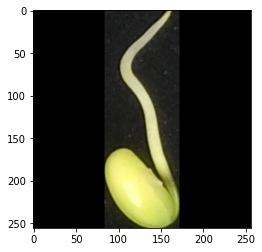

In [10]:
for i in range(len(images)):
    images[i] = pad_image(images[i], IMG_SIZE, IMG_SIZE)
    plt.imshow(images[i])

In [11]:
for i in range(0, len(images)):
    images[i] = cv2.resize(images[i], dsize=(IMG_SIZE, IMG_SIZE), interpolation=cv2.INTER_CUBIC)
    images[i] = np.array(images[i])
    labels[i] = np.array(labels[i])

images = np.array(images)
labels = np.array(labels)
labels_test = labels.reshape(-1,1)

##one hot 
import pandas as pd

labels = pd.get_dummies(labels)
labels = pd.DataFrame.to_numpy(labels)

#normalizing images    
images = tf.keras.utils.normalize(images, axis=0, order=2)

In [12]:
print(labels[0].shape)

(3,)


#### Creating the model


In [13]:
BATCH_SIZE = 32
EPOCHS = 15
TRAIN_TEST_SPLIT = 0.25

In [78]:
model = Sequential()

model.add(   Conv2D(8, (3,3), input_shape=images.shape[1:])   )
model.add(Activation("relu"))
model.add(Dropout(0.2, input_shape=images.shape[1:]))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(4, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(16))

model.add(Dense(3))
model.add(Activation("sigmoid"))

METRICDIR = './metricas/classificacao/3_d/eight_four_sixteen/'
my_metrics = ["accuracy",
           tf.keras.metrics.Precision(),
           tf.keras.metrics.Recall(),
           tf.keras.metrics.AUC(),
           tf.keras.metrics.TruePositives(),
           tf.keras.metrics.TrueNegatives(),
           tf.keras.metrics.FalsePositives(),
           tf.keras.metrics.FalseNegatives(),]

opt = keras.optimizers.Adam(learning_rate=0.005)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=my_metrics)

In [79]:
history = model.fit(images, labels, batch_size = BATCH_SIZE, epochs = EPOCHS, validation_split=TRAIN_TEST_SPLIT)

Epoch 1/15
26/26 [==============================] - 11s 370ms/step - loss: 0.6703 - accuracy: 0.7656 - precision_9: 0.5791 - recall_9: 0.8894 - auc_9: 0.8686 - true_positives_9: 399.4815 - true_negatives_9: 630.7407 - false_positives_9: 261.8519 - false_negatives_9: 46.8148 - val_loss: 0.3264 - val_accuracy: 0.8804 - val_precision_9: 0.7043 - val_recall_9: 0.9493 - val_auc_9: 0.9580 - val_true_positives_9: 262.0000 - val_true_negatives_9: 442.0000 - val_false_positives_9: 110.0000 - val_false_negatives_9: 14.0000
Epoch 2/15
26/26 [==============================] - 8s 325ms/step - loss: 0.2968 - accuracy: 0.8903 - precision_9: 0.7637 - recall_9: 0.9421 - auc_9: 0.9708 - true_positives_9: 421.1852 - true_negatives_9: 768.5185 - false_positives_9: 124.0741 - false_negatives_9: 25.1111 - val_loss: 0.2517 - val_accuracy: 0.9094 - val_precision_9: 0.8259 - val_recall_9: 0.9457 - val_auc_9: 0.9817 - val_true_positives_9: 261.0000 - val_true_negatives_9: 497.0000 - val_false_positives_9: 55.00

In [80]:
model.evaluate(images, labels)

35/35 [==============================] - 2s 67ms/step - loss: 0.1230 - accuracy: 0.9718 - precision_9: 0.8071 - recall_9: 0.9882 - auc_9: 0.9930 - true_positives_9: 1088.0000 - true_negatives_9: 1942.0000 - false_positives_9: 260.0000 - false_negatives_9: 13.0000


[0.1230197548866272,
 0.9718437790870667,
 0.8071216344833374,
 0.9881925582885742,
 0.9929775595664978,
 1088.0,
 1942.0,
 260.0,
 13.0]

#### Visualizing model data

In [85]:
import matplotlib.pyplot as plt

In [86]:
NUM_METRICS = len(my_metrics)


def plot_metric(metric_name, chart_name):
    plt.plot(history.history[metric_name], label = metric_name + ' (training data)')
    plt.plot(history.history['val_' + metric_name], label = metric_name + ' (validation data)')
    plt.title(chart_name)
    plt.ylabel( metric_name + ' value')
    plt.xlabel('No. epoch')
    plt.legend(loc="upper left")
    if not os.path.exists(METRICDIR):
        os.mkdir(METRICDIR)
    plt.savefig(os.path.join(METRICDIR, metric_name))
    plt.show()


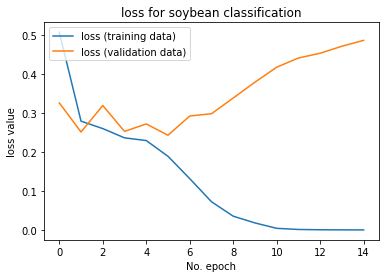

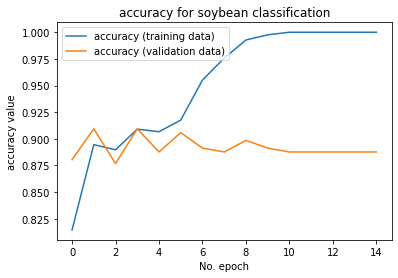

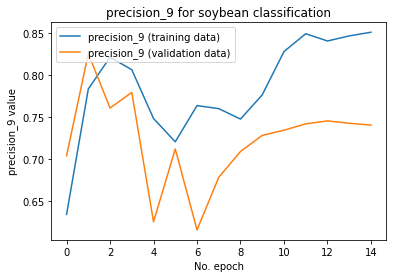

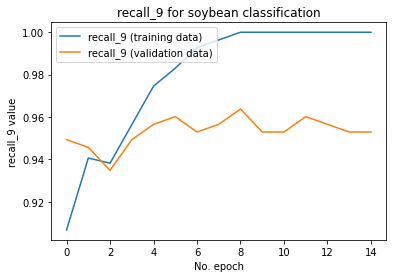

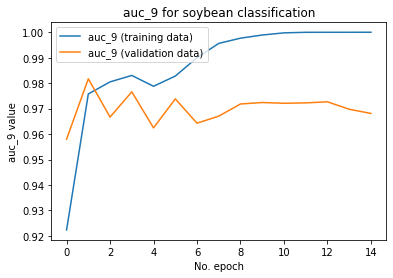

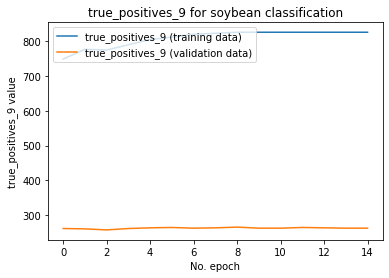

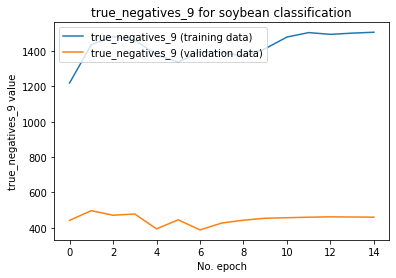

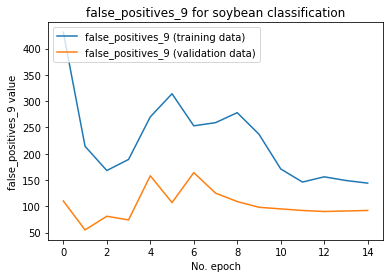

In [87]:
for metric in list(history.history.keys())[:NUM_METRICS]:
    plot_metric(metric, metric + " for soybean classification")


In [84]:
MODELDIR = os.path.join(METRICDIR, "model")
if not os.path.exists(MODELDIR):
    os.mkdir(MODELDIR)
model.save(MODELDIR)

INFO:tensorflow:Assets written to: ./metricas/classificacao/3_d/eight_four_sixteen/model/assets
